# Twiss

This is an example of plotting lines and twiss results.
First, create a simple line and a tracker:

In [1]:
import xtrack as xt
import xpart as xp
import xplot as xplt
import numpy as np

In [2]:
## Generate a simple 6-fold symmetric FODO lattice
n = 6
fodo = [
    xt.Multipole(length=0.2, knl=[0, +0.2], ksl=[0, 0]),
    xt.Drift(length=1.0),
    xt.Multipole(length=0.2, knl=[0, -0.2], ksl=[0, 0]),
    xt.Drift(length=1.0),
    xt.Multipole(length=1.0, knl=[2 * np.pi / n], hxl=[2 * np.pi / n]),
    xt.Drift(length=1.0),
]
line = xt.Line(elements=n * fodo)
tracker = xt.Tracker(line=line)

generating ./49b3eebb927242979b31d2c423d4e2c1.c
the current directory is '/mnt/d/pniederm/Hessenbox/GSI/Particle-Tracking/xplot/examples'
running build_ext
building '49b3eebb927242979b31d2c423d4e2c1' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.8 -c 49b3eebb927242979b31d2c423d4e2c1.c -o ./49b3eebb927242979b31d2c423d4e2c1.o -std=c99 -O3 -Wno-unused-function
x86_64-linux-gnu-gcc -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fwrapv -O2 -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 ./49b3eebb927242979b31d2c423d4e2c1.o -o ./49b3eebb927242979b31d2c423d4e2c1.cpython-38-x86_64-linux-gnu.so -std=c99

Then determine it's twiss parameters. We use the `at_s` parameter to get the result as function of s rather than at each element only.

In [3]:
tw = tracker.twiss(
    method="4d",
    particle_ref=xp.Particles(mass0=xp.PROTON_MASS_EV, q0=1, p0c=1e12),
    at_s=np.linspace(0, line.get_length(), 500),
)

## Default twiss plot

Create a default {class}`TwissPlot <xplot.twiss.TwissPlot>`:

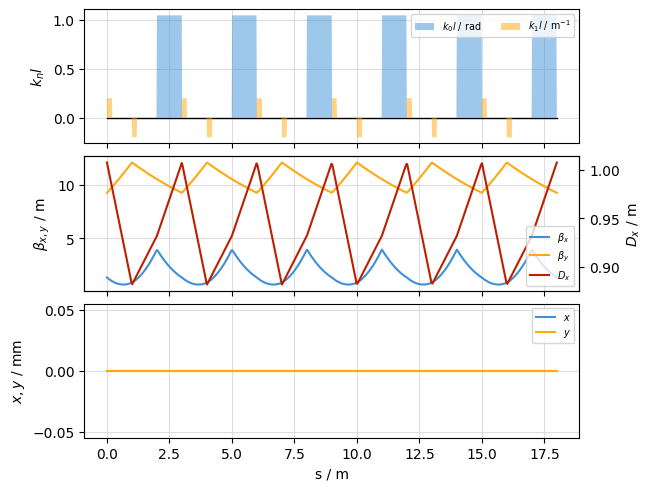

In [4]:
plot = xplt.TwissPlot(tw, line=line)

## Customisation

Use the parameter `kind` to specify what is plotted. See {class}`TwissPlot <xplot.twiss.TwissPlot>` for details.

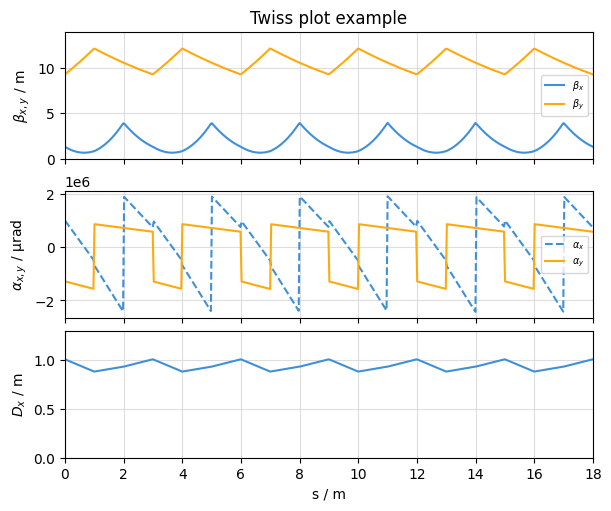

In [5]:
plot = xplt.TwissPlot(
    tw, figsize=(6, 5), kind="bet,alfx+alfy,dx", display_units=dict(alf="urad")
)

# adjust some axes
plot.ax[0].set(title="Twiss plot example", ylim=(0, 14))
plot.ax[2].set(ylim=(0, 1.3), xlim=(0, line.get_length()))
plot.ax[0].legend(loc="right")

# adjust line layout
plot.artists[1][0][0].set_ls("--")
plot.ax[1].legend();

-----------------
```{seealso}
- {class}`xplot.twiss`
```